<a href="https://colab.research.google.com/github/jcmachicao/curso_intro_nn/blob/main/arbol_decisiones_simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

In [ ]:
data100 = pd.read_excel('manzanas.xlsx')
data100

,peso,aroma,precio,diametro,color,estado
0,61.0,agradable,3.0,7.7,marron,comestible
1,61.0,agradable,4.0,8.0,rojo,comestible
2,55.0,agradable,5.0,6.2,rojo,comestible
3,48.0,desagradable,4.0,6.1,marron,malograda
4,50.0,agradable,2.0,5.9,marron,malograda
...,...,...,...,...,...,...
86,62.0,agradable,5.0,8.2,rojo,comestible
87,59.0,agradable,6.0,7.7,marron,comestible
88,61.0,desagradable,6.0,8.0,verde,comestible
89,40.0,agradable,6.0,6.3,verde,comestible


In [ ]:
data100.head()

,peso,aroma,precio,diametro,color,estado
0,61.0,agradable,3.0,7.7,marron,comestible
1,61.0,agradable,4.0,8.0,rojo,comestible
2,55.0,agradable,5.0,6.2,rojo,comestible
3,48.0,desagradable,4.0,6.1,marron,malograda
4,50.0,agradable,2.0,5.9,marron,malograda


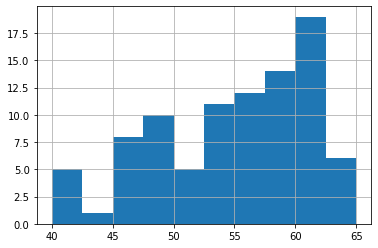

In [ ]:
data100.peso.hist()

In [ ]:
data100.aroma.value_counts()

agradable       61
desagradable    30
Name: aroma, dtype: int64

In [ ]:
data100.color.unique()

array(['marron', 'rojo', 'verde'], dtype=object)

In [ ]:
data200 = pd.get_dummies(data100, drop_first=True)
data200.head()

,peso,precio,diametro,aroma_desagradable,color_rojo,color_verde,estado_malograda
0,61.0,3.0,7.7,0,0,0,0
1,61.0,4.0,8.0,0,1,0,0
2,55.0,5.0,6.2,0,1,0,0
3,48.0,4.0,6.1,1,0,0,1
4,50.0,2.0,5.9,0,0,0,1


In [ ]:
X = data200.drop(['estado_malograda'], axis=1) # predictores
y = data200.estado_malograda # variable predicha
X.shape, y.shape

((91, 6), (91,))

(array([61.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 30.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

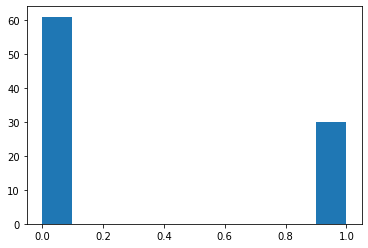

In [ ]:
plt.hist(y)

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
model = DecisionTreeClassifier(max_depth=3)

In [ ]:
model.fit(X, y)

DecisionTreeClassifier(max_depth=3)

In [ ]:
data200['prediccion'] = model.predict(X)
data200['coincide'] = data200.estado_malograda == data200.prediccion

In [ ]:
data200.head()

,peso,precio,diametro,aroma_desagradable,color_rojo,color_verde,estado_malograda,prediccion,coincide
0,61.0,3.0,7.7,0,0,0,0,0,True
1,61.0,4.0,8.0,0,1,0,0,0,True
2,55.0,5.0,6.2,0,1,0,0,0,True
3,48.0,4.0,6.1,1,0,0,1,1,True
4,50.0,2.0,5.9,0,0,0,1,1,True


In [ ]:
data200.coincide.sum()/len(data200)

0.989010989010989

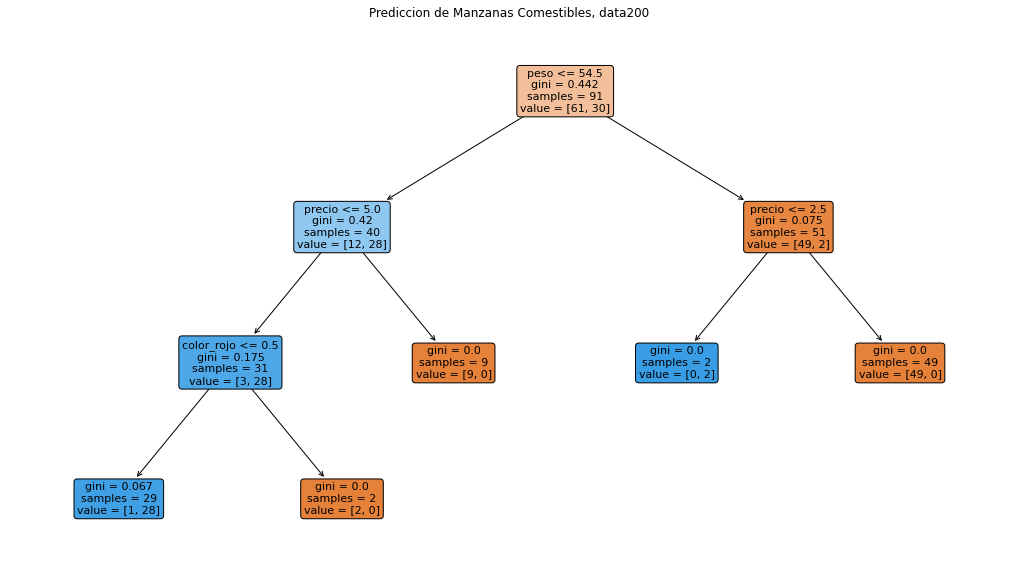

In [ ]:
plt.figure(figsize=(18,10))
plot_tree(model, max_depth=3, rounded=True, fontsize=11, label='all', filled=True, feature_names=X.columns)
plt.title('Prediccion de Manzanas Comestibles, data200')
plt.show()